## Dataset Creation

In [27]:
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

In [28]:
def getDataframe(filename):
    readFile = open(filename, 'r')
    reader = csv.reader(readFile)

    data = list()  
    for row in reader:
        data.append(row)
    readFile.close()

    df = pd.DataFrame.from_dict(data)

    df.columns = df.iloc[0]
    df = df.drop(0)
    
    df["GLCM_pan"] = pd.to_numeric(df["GLCM_pan"], downcast="float")
    df["Mean_Green"] = pd.to_numeric(df["Mean_Green"], downcast="float")
    df["Mean_Red"] = pd.to_numeric(df["Mean_Red"], downcast="float")
    df["Mean_NIR"] = pd.to_numeric(df["Mean_NIR"], downcast="float")
    df["SD_pan"] = pd.to_numeric(df["GLCM_pan"], downcast="float")
    return df

In [29]:
dfTrain = getDataframe("wilt/training.csv")
dfTrain = dfTrain[["GLCM_pan", "Mean_Green", "Mean_Red", "Mean_NIR", "SD_pan", "class"]]
dfTrain.head(5)

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,class
1,120.362770,205.500000,119.395348,416.581390,120.362770,w
2,124.739586,202.800003,115.333336,354.333344,124.739586,w
3,134.691971,199.285721,116.857140,477.857147,134.691971,w
4,127.946312,178.368423,92.368423,278.473694,127.946312,w
5,135.431549,197.000000,112.690475,532.952393,135.431549,w


In [30]:
dfTest = getDataframe("wilt/testing.csv")
dfTest = dfTest[["GLCM_pan", "Mean_Green", "Mean_Red", "Mean_NIR", "SD_pan", "class"]]
dfTest.head(5)

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,class
1,109.828575,183.699997,82.949997,251.750000,109.828575,n
2,130.284485,212.637924,96.896553,482.396545,130.284485,n
3,131.386551,185.466660,85.466667,419.666656,131.386551,n
4,141.345093,180.875000,81.500000,348.062500,141.345093,n
5,121.383408,218.357147,112.017860,426.607147,121.383408,w


In [31]:
df = pd.concat([dfTrain,dfTest])
# # dfNew = df.sample(frac=0.2)
# print(dfNew[dfNew['class']=='w'].shape)
# print(dfNew[dfNew['class']=='n'].shape)
# dfNew.to_csv("wilt/dataset.csv", header=False, index=False)

In [ ]:
def categorize(df, ncat, column):
    bins = [0]
    for i in range(ncat):
        bins.append(df.quantile(1/)[column])
    df[column] = pd.cut(df.GLCM_pan, bins=bins)
    return df 

In [35]:
# Categorizando os Atributos

bins = [0, 100, 125, 150, 200]
df['Mean_Green'] = pd.cut(df.GLCM_pan, bins=bins)
df

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,class
1,120.362770,"(100, 125]",119.395348,416.581390,120.362770,w
2,124.739586,"(100, 125]",115.333336,354.333344,124.739586,w
3,134.691971,"(125, 150]",116.857140,477.857147,134.691971,w
4,127.946312,"(125, 150]",92.368423,278.473694,127.946312,w
5,135.431549,"(125, 150]",112.690475,532.952393,135.431549,w
6,118.347961,"(100, 125]",138.850006,608.900024,118.347961,w
7,135.436279,"(125, 150]",95.142860,309.190491,135.436279,w
8,121.169640,"(100, 125]",146.214279,595.571411,121.169640,w
9,131.127167,"(125, 150]",144.588242,563.843140,131.127167,w
10,134.498093,"(125, 150]",116.909088,594.848511,134.498093,w


In [34]:
print('First Quantil:')
print(df.quantile(0.25))
print('Second Quantil:')
print(df.quantile(0.50))
print('Third Quantil:')
print(df.quantile(0.75))

First Quantil:
118.758945465
Second Quantil:
0
GLCM_pan      127.481873
Mean_Green    219.260864
Mean_Red      101.631577
Mean_NIR      518.657166
SD_pan        127.481873
Name: 0.5, dtype: float64
Third Quantil:
0
GLCM_pan      134.947784
Mean_Green    239.860580
Mean_Red      116.969685
Mean_NIR      635.133423
SD_pan        134.947784
Name: 0.75, dtype: float64


### Dataset Statistics

In [16]:
print("Valores Máximos:")
print(df.max())
print("Valores Mínimos:")
print(df.min())

Valores Máximos:
0
GLCM_pan      183.281
Mean_Green    1848.92
Mean_Red      1594.58
Mean_NIR      1597.33
SD_pan        183.281
class               w
dtype: object
Valores Mínimos:
0
GLCM_pan            0
Mean_Green    117.211
Mean_Red      50.5789
Mean_NIR         86.5
SD_pan              0
class               n
dtype: object


In [17]:
print("Tamanho do dataset:",df.shape)
# GLCM_pan, Mean_Green, Mean_Red, Mean_NIR, SD_pan, class

Tamanho do dataset: (4839, 6)


In [18]:
print(df[df['class']=='w'].shape)
print(df[df['class']=='n'].shape)

(261, 6)
(4578, 6)


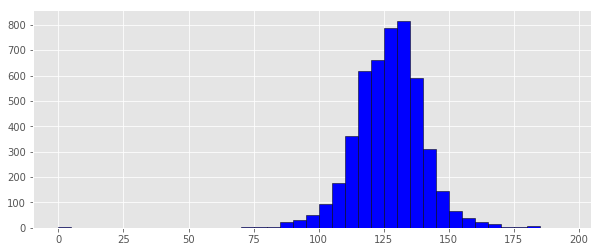

In [19]:
plt.figure(figsize=(10,4))
plt.hist(df['GLCM_pan'], bins=range(0,200,5), histtype='bar', ec='black', color='blue')
plt.show()

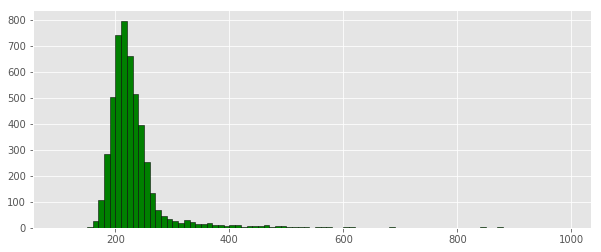

In [20]:
plt.figure(figsize=(10,4))
plt.hist(df['Mean_Green'], bins=range(100,1000,10), histtype='bar', ec='black', color='green') 
plt.show()

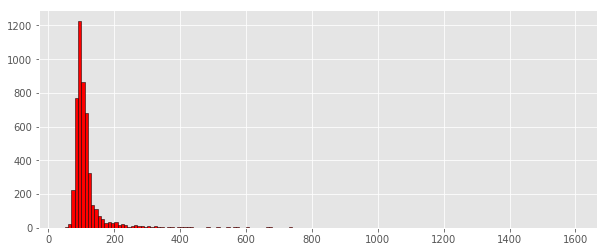

In [21]:
plt.figure(figsize=(10,4))
plt.hist(df['Mean_Red'], bins=range(50,1600,10), histtype='bar', ec='black', color='red')
plt.show()

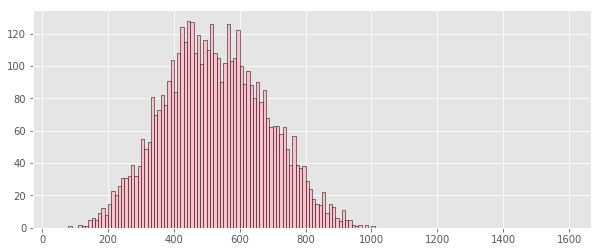

In [22]:
plt.figure(figsize=(10,4))
plt.hist(df['Mean_NIR'], bins=range(50,1600,10), histtype='bar', ec='black', color='pink')
plt.show()

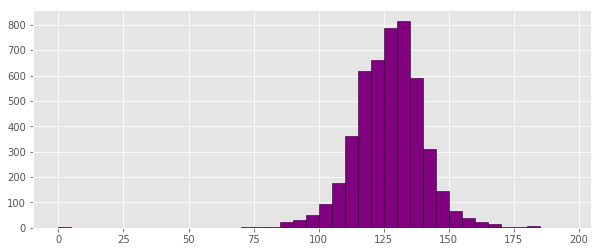

In [23]:
plt.figure(figsize=(10,4))
plt.hist(df['SD_pan'], bins=range(0,200,5), histtype='bar', ec='black', color='purple')
plt.show()